 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
whale_returns_csv = Path("./Resources/whale_returns.csv")

In [4]:
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [5]:
# Reading whale returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("./Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

C:\Users\Ivan\AppData\Local\Temp\ipykernel_60144\3983748907.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


In [14]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['SP TSX 60']
sp_tsx_returns.columns = columns
sp_tsx_returns.head()

,SP TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolio'}, xlabel='Date'>

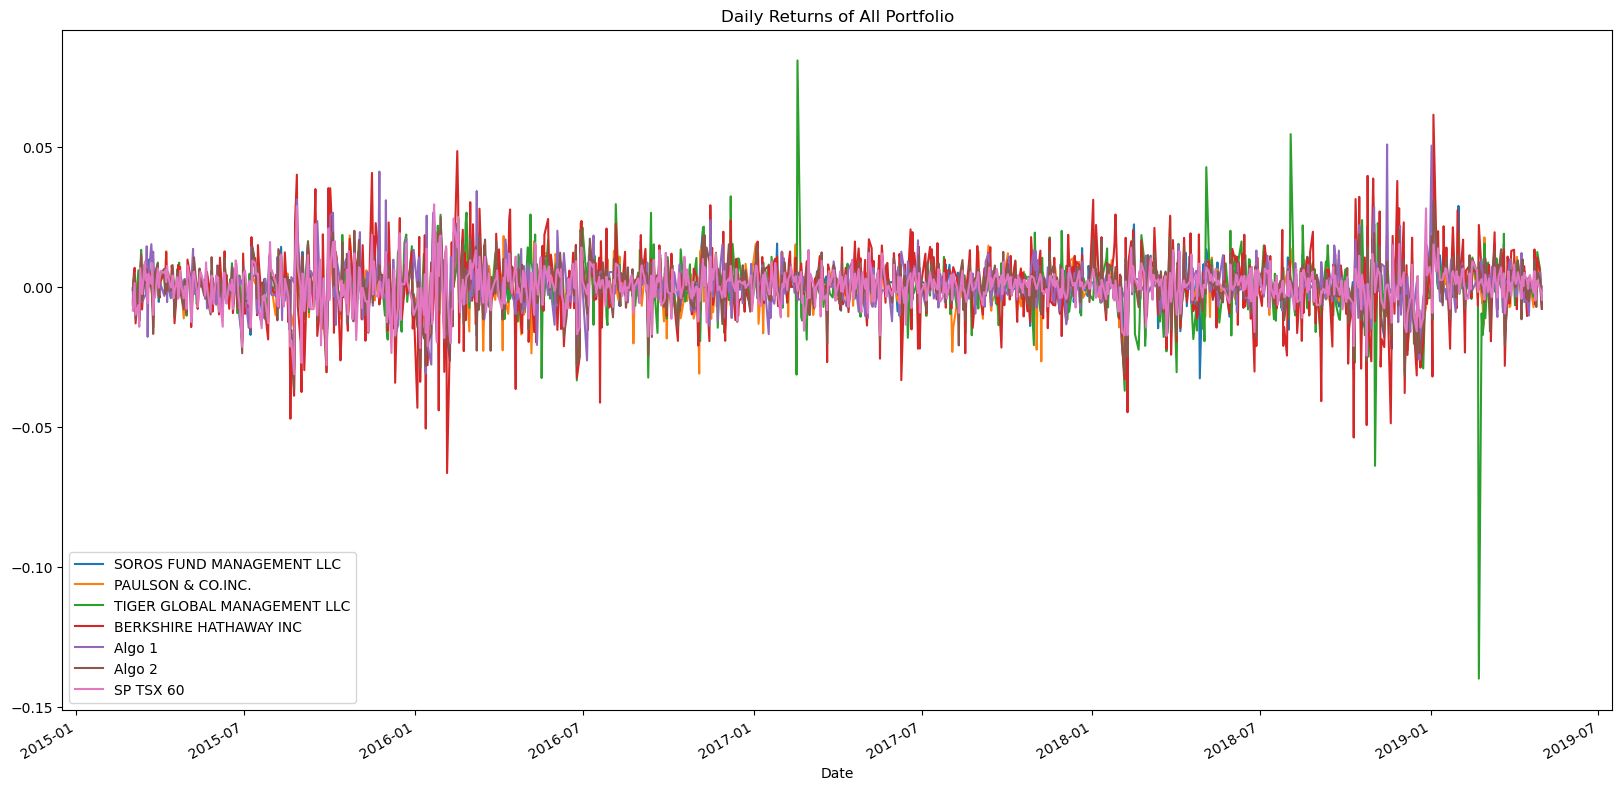

In [18]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10), title = "Daily Returns of All Portfolio")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

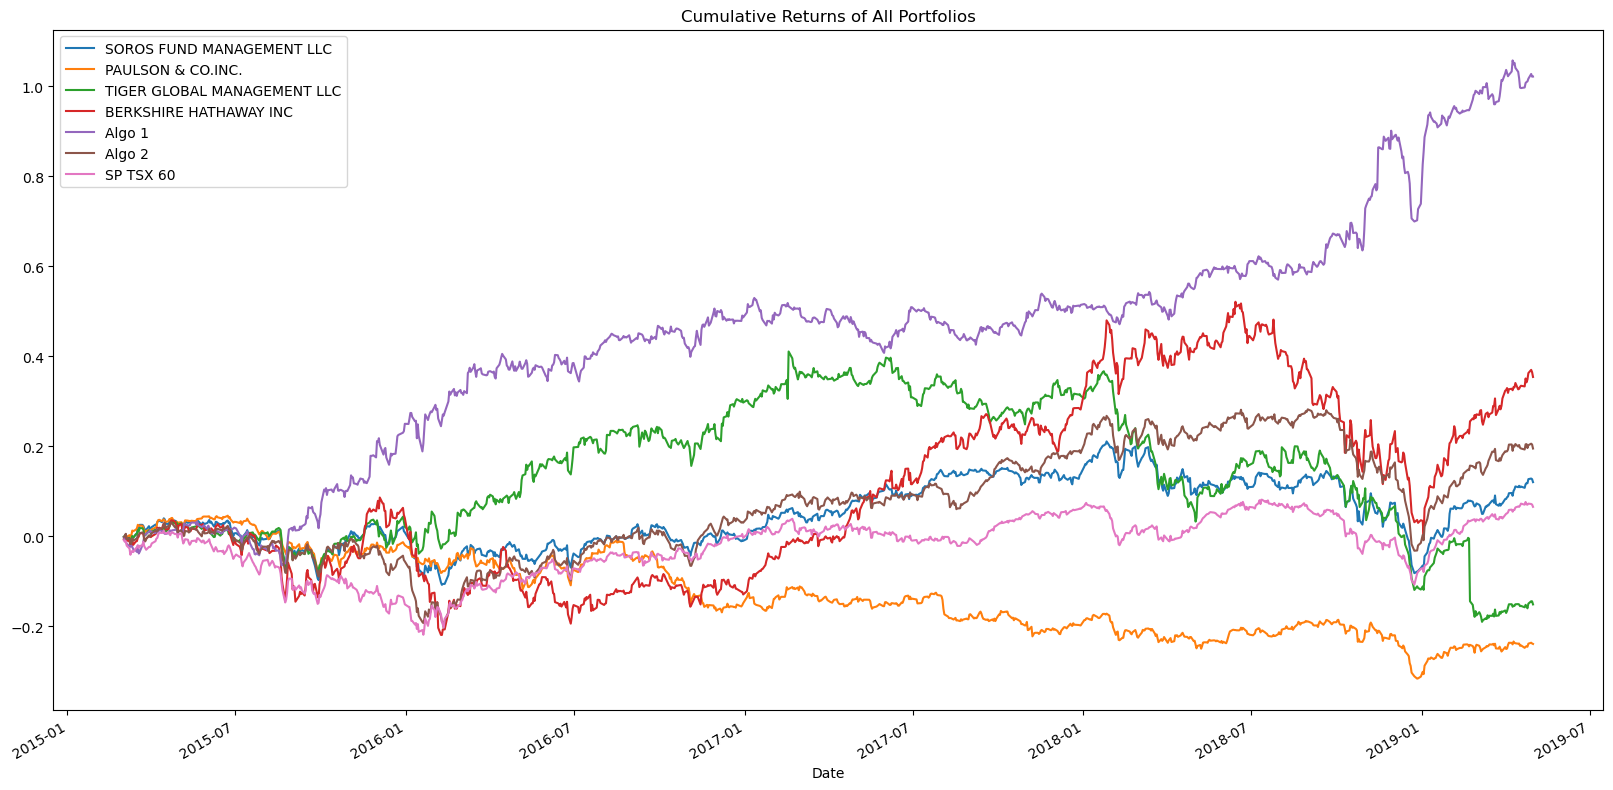

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

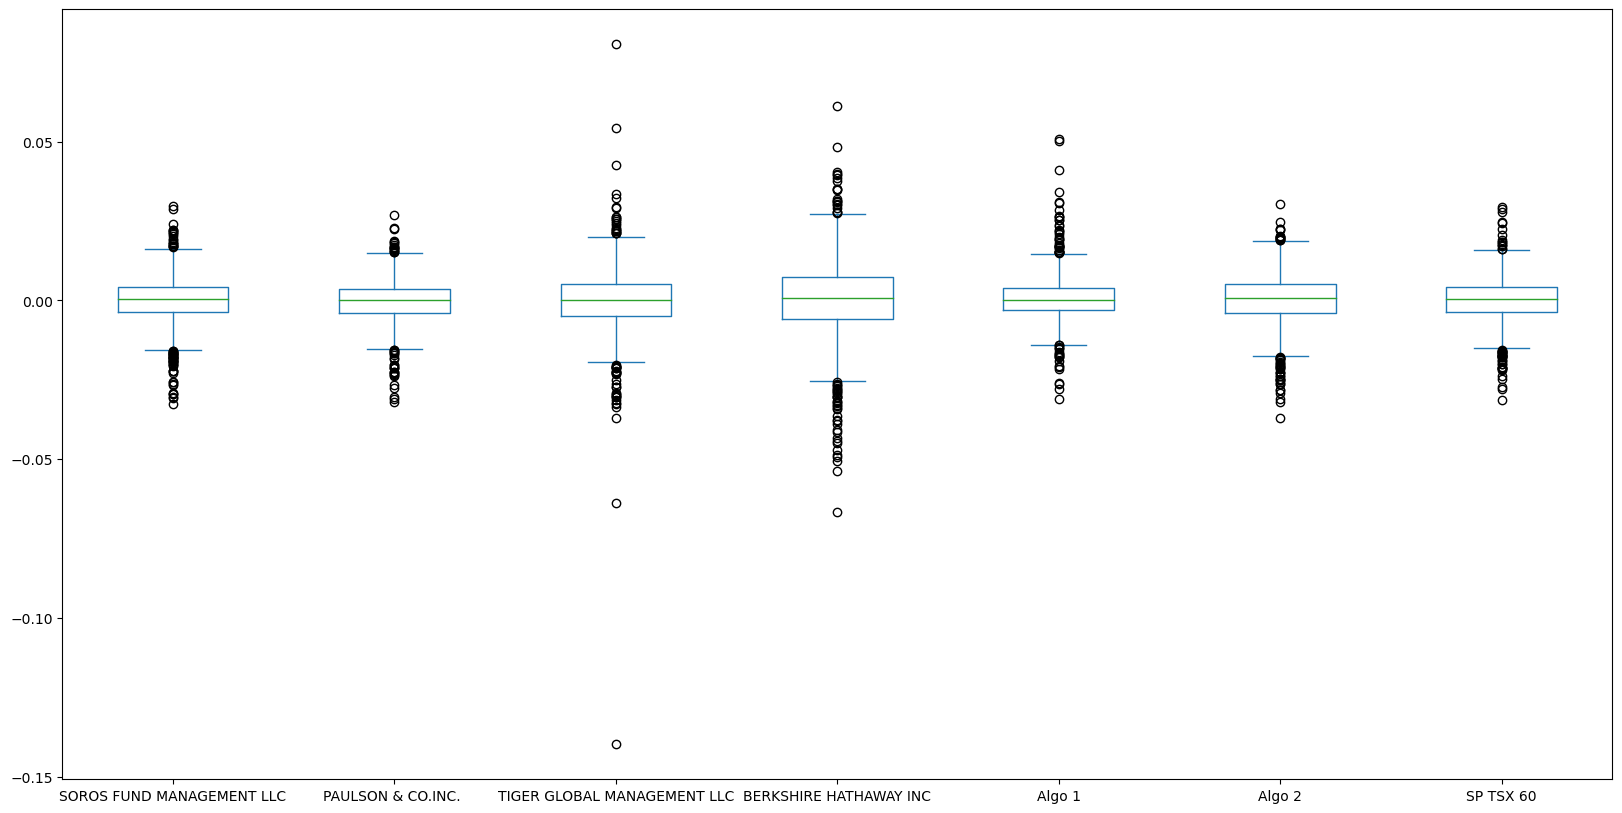

In [20]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX 60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60

print(daily_std['SP TSX 60'])

# Determine which portfolios are riskier than the S&P TSX 60
daily_std.sort_values(ascending=False)

0.007034167748577725


BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP TSX 60                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

Standard Deviation of S&P TSX 60 is 0.007034167748577725

BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC, Algo 2, SOROS FUND MANAGEMENT LLC and Algo 1 are risker than S&P TSX 60

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX 60                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation for All Portfolios'}, xlabel='Date'>

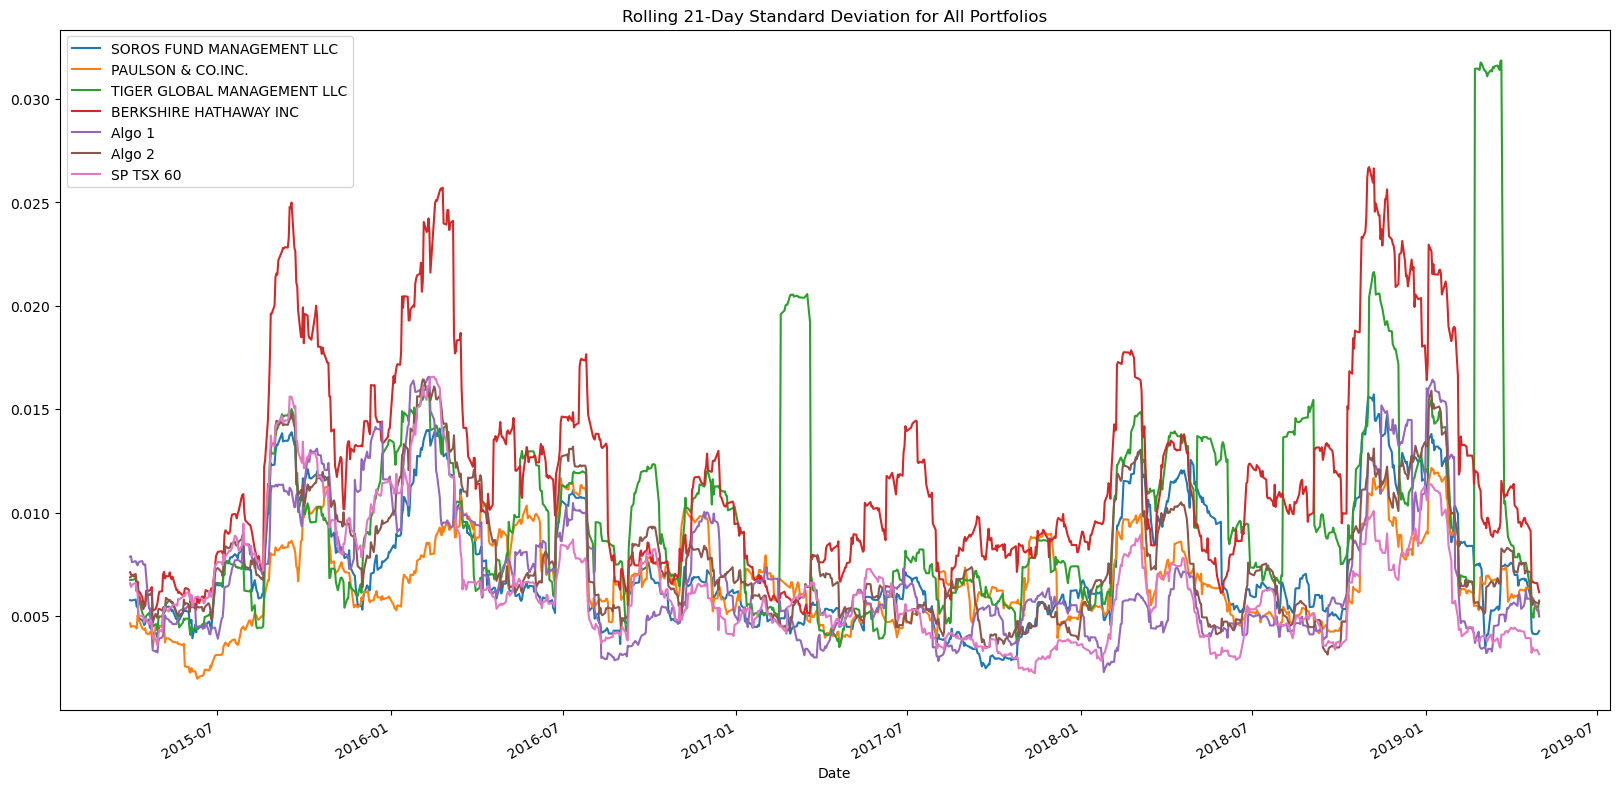

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling 21-Day Standard Deviation for All Portfolios")

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
#correlation.plot(figsize=(20, 10), title = "Correlation for All Portfolios")
correlation.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'60-days Rolling Beta between Algo 1 and S&P TSX 60'}, xlabel='Date'>

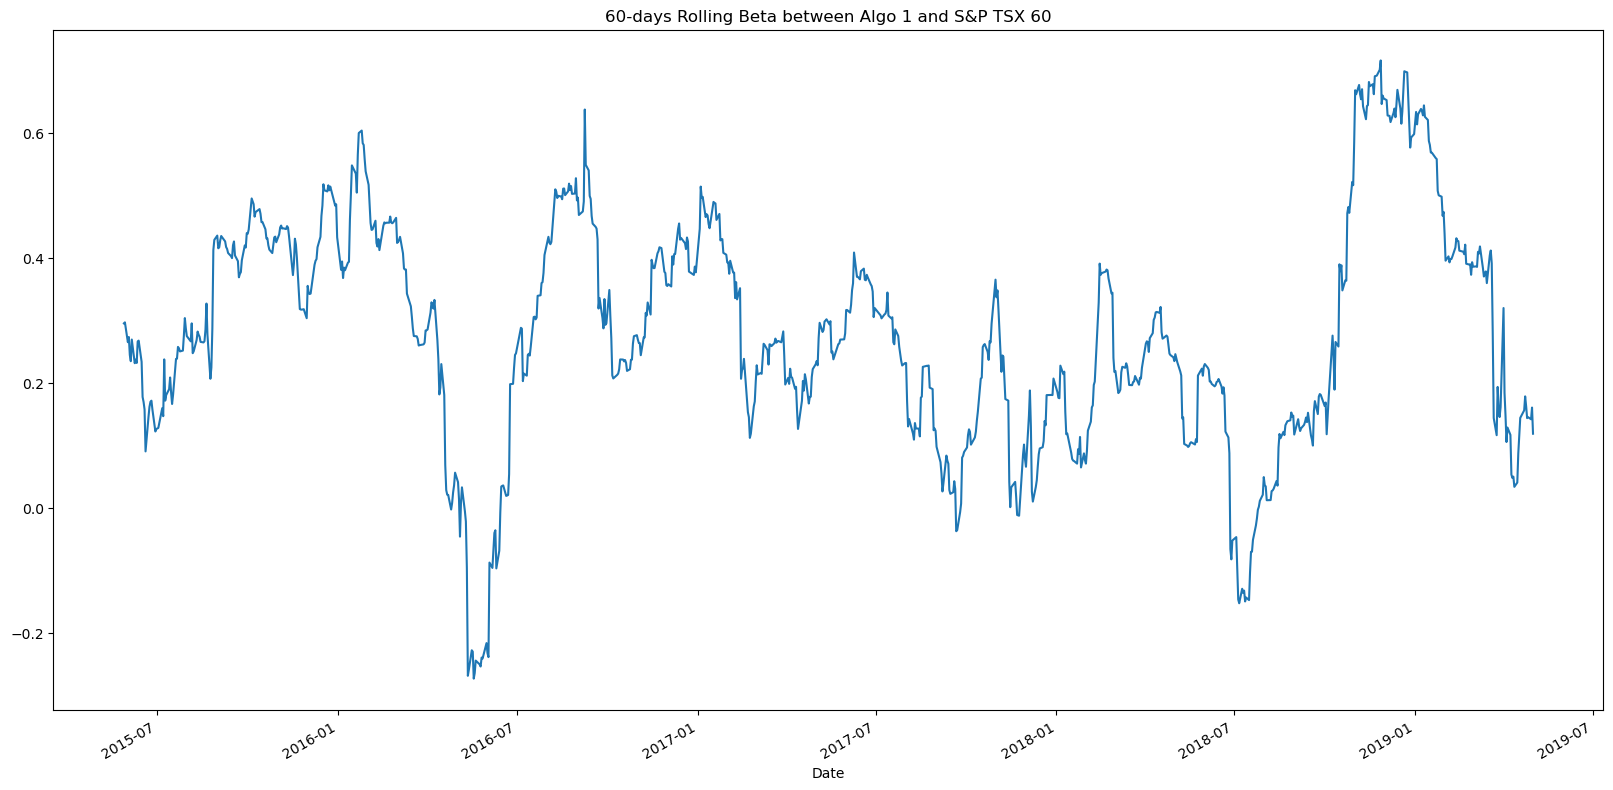

In [26]:
# Calculate covariance of a single portfolio

covariance_algo1 = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['SP TSX 60'])

# Calculate variance of S&P TSX

variance = combined_returns['SP TSX 60'].rolling(window=60).var()

# Computing beta

beta = covariance_algo1 / variance

# Plot beta trend
beta.plot(figsize=(20,10), title = "60-days Rolling Beta between Algo 1 and S&P TSX 60")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = (combined_returns.mean()*252) / (combined_returns.std() * np.sqrt(252))
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX 60                      0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for All Portfolio'}>

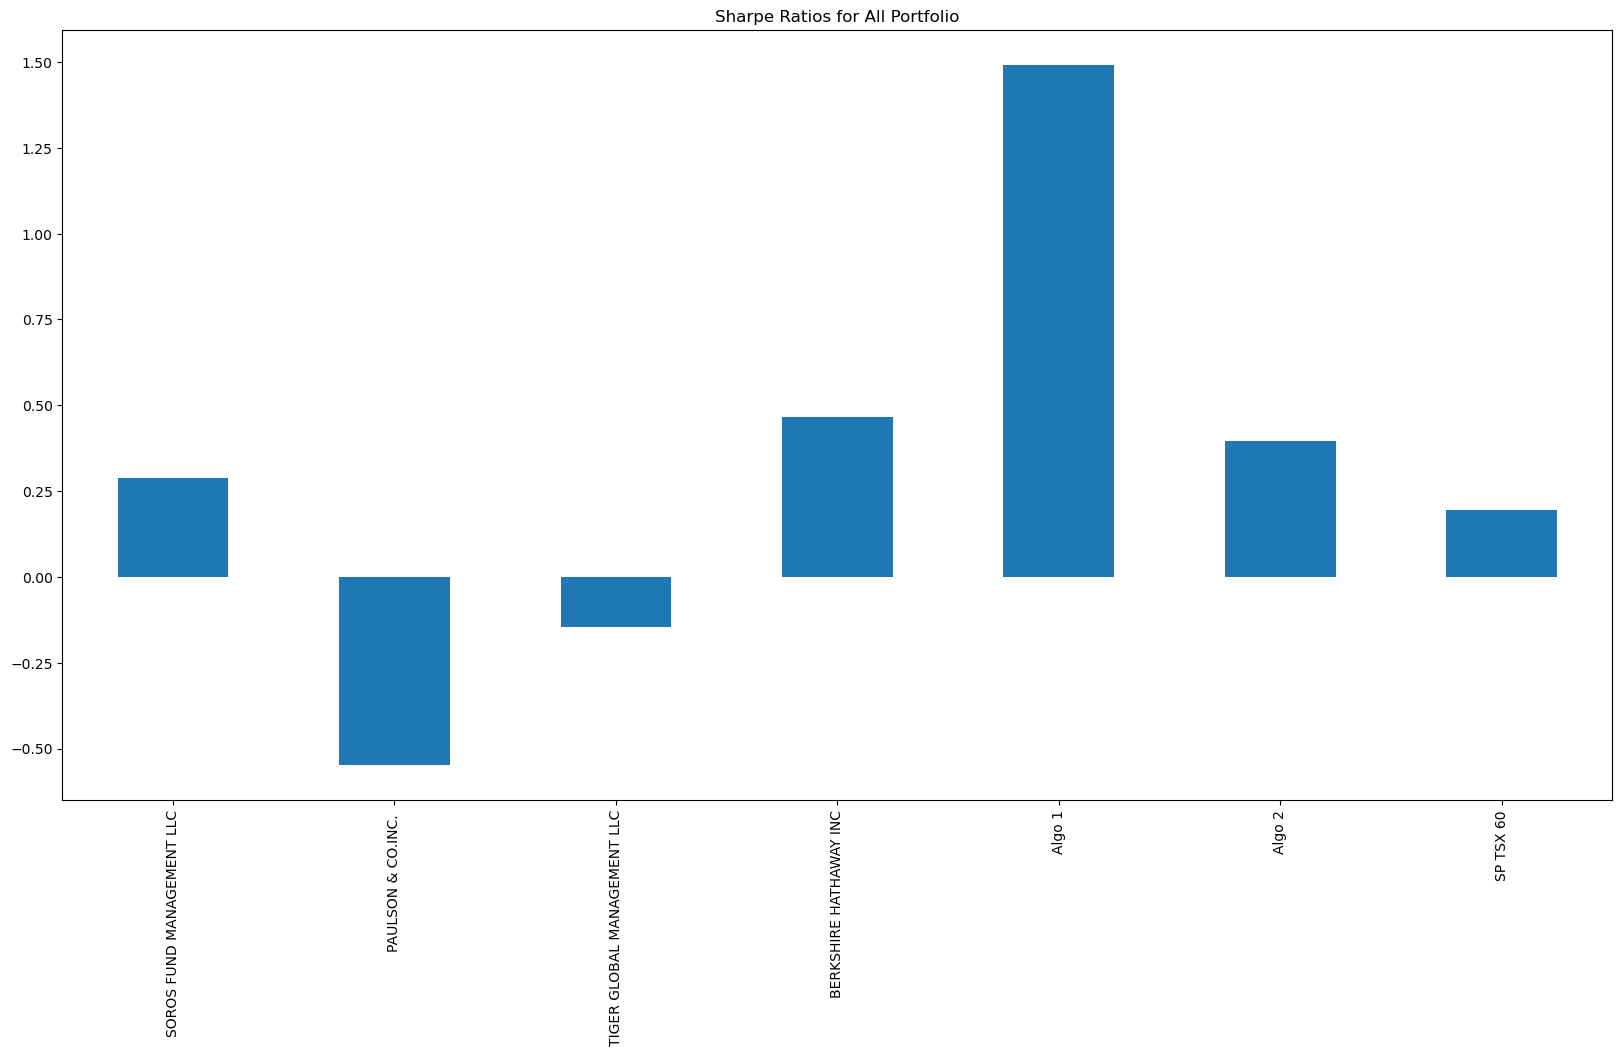

In [29]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(figsize=(20,10), title = "Sharpe Ratios for All Portfolio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 outperform both whale portfolios and S&P TSX 60.
Algo 2 outperform the market S&P TSX 60. It is in a good trend, but BERKSHIRE HATHAWAY INC from whales portfolios outperform Algo 2. The rest of single portfolios are behind Algo 2.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
l_csv = Path("./Resources/l_historical.csv")
l_data = pd.read_csv(l_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
l_data.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [31]:
# Reading data from 2nd stock
otex_csv = Path("./Resources/otex_historical.csv")
otex_data = pd.read_csv(otex_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
otex_data.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [32]:
# Reading data from 3rd stock
shop_csv = Path("./Resources/shop_historical.csv")
shop_data = pd.read_csv(shop_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
shop_data.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [33]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([l_data, otex_data, shop_data], axis='rows', join='inner')
my_portfolio.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [34]:
# Reset Date index
my_portfolio.reset_index(inplace=True)
my_portfolio.head()

,Date,Symbol,Close
0,2018-01-02,L,57.99
1,2018-01-03,L,57.41
2,2018-01-04,L,57.42
3,2018-01-05,L,57.42
4,2018-01-08,L,56.86


In [35]:
# Reorganize portfolio data by having a column per symbol
my_portfolio = my_portfolio.pivot_table(values='Close', index='Date', columns='Symbol')
my_portfolio.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [36]:
# Calculate daily returns

daily_returns = my_portfolio.pct_change()

# Drop NAs

daily_returns = daily_returns.dropna()

# Display sample data

daily_returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = daily_returns.dot(weights)

# Display sample data

portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['Custom Portfolio'] = portfolio_returns
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = combined_returns.dropna()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60,Custom Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
portfolio_annual_std = all_returns.std() * np.sqrt(252)
portfolio_annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP TSX 60                      0.099121
Custom Portfolio               0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling standard Deviation of My Portfolio'}, xlabel='Date'>

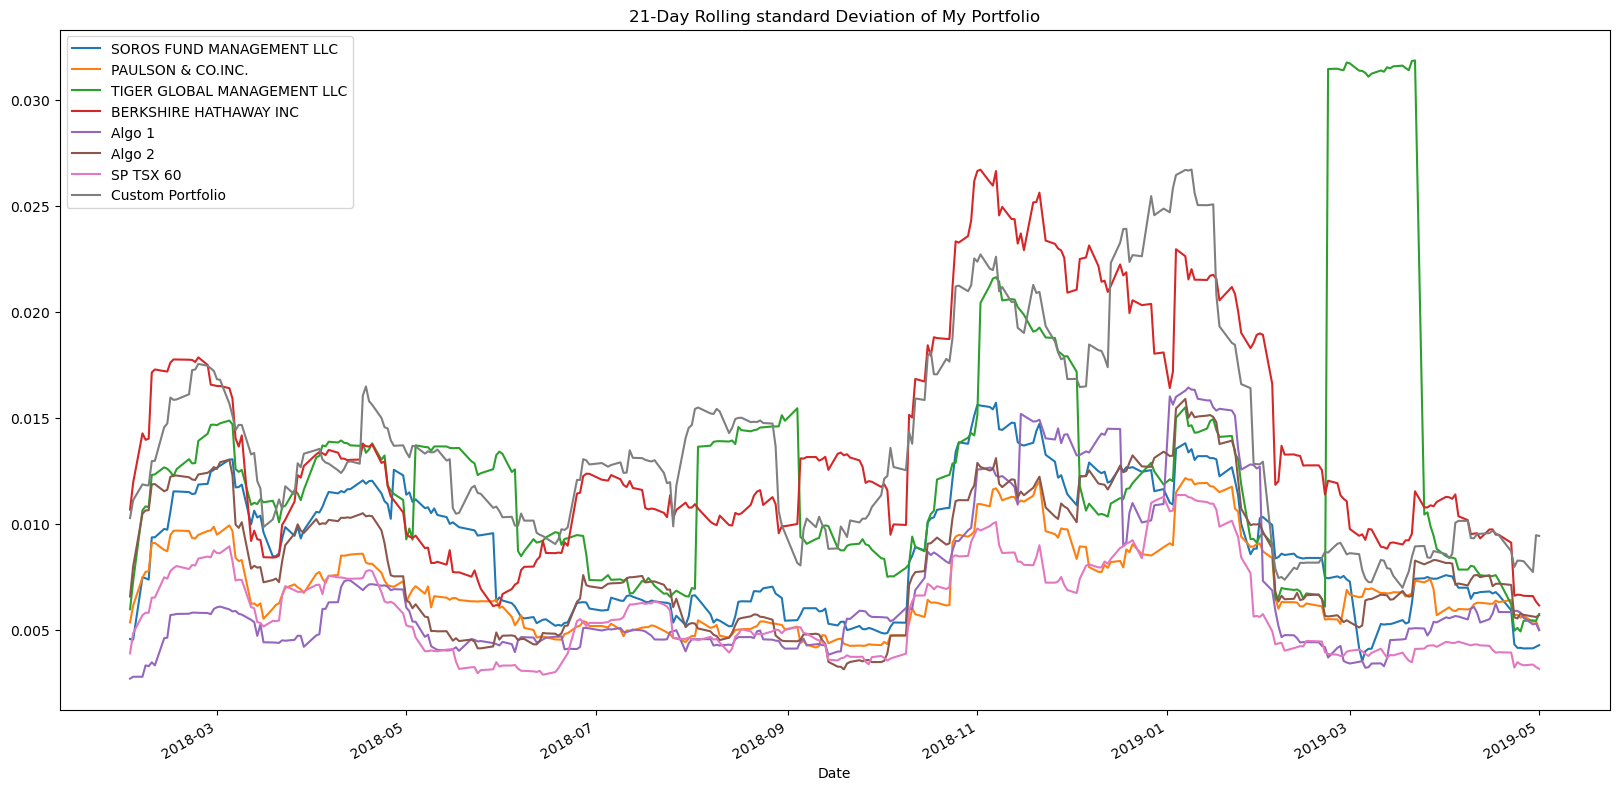

In [42]:
# Calculate rolling standard deviation
portfolio_rolling_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_rolling_std.plot(figsize=(20,10), title = "21-Day Rolling standard Deviation of My Portfolio")

### Calculate and plot the correlation

<AxesSubplot:>

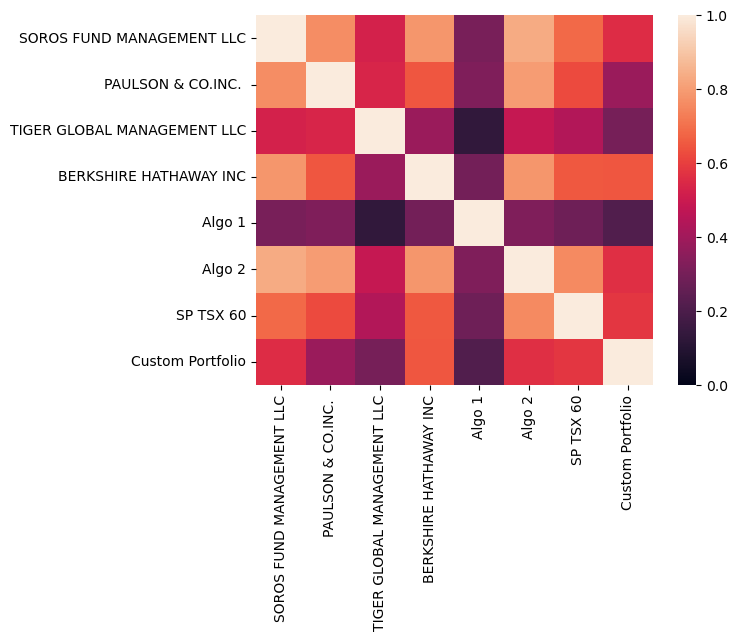

In [43]:
# Calculate and plot the correlation
portfolio_correlation = all_returns.corr()
sns.heatmap(portfolio_correlation, vmin=0, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'60-day Rolling Beta for My Portfolio compared to S&P 60 TSX'}, xlabel='Date'>

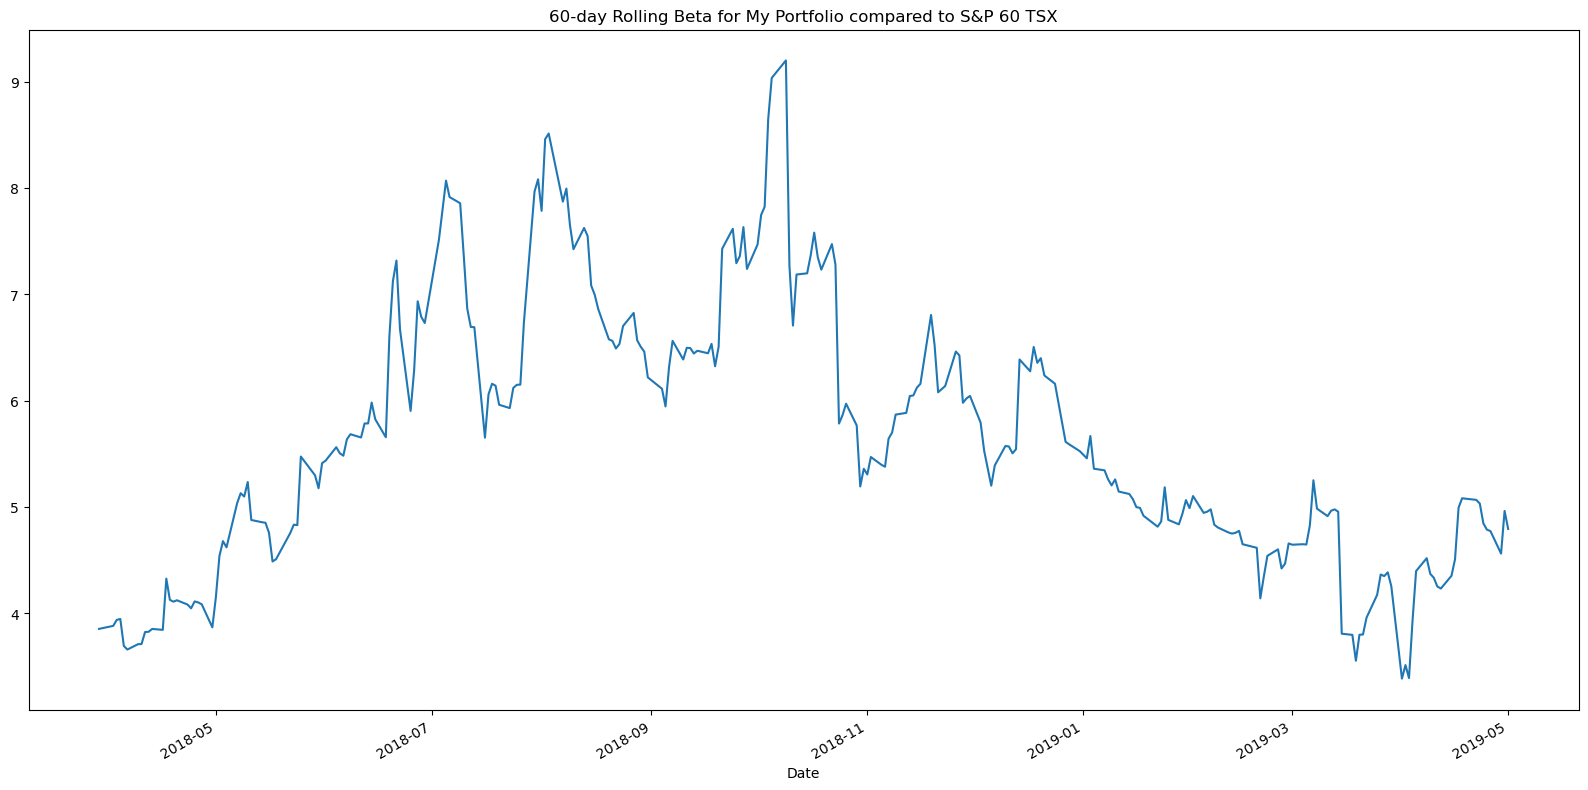

In [44]:
# Calculate and plot Beta
portfolio_covariance = all_returns['Custom Portfolio'].rolling(window=60).cov()
portfolio_beta = portfolio_covariance / variance
portfolio_beta.plot(figsize=(20,10), title="60-day Rolling Beta for My Portfolio compared to S&P 60 TSX" )


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP TSX 60                      0.034651
Custom Portfolio               1.564547
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios for My Portfolio'}>

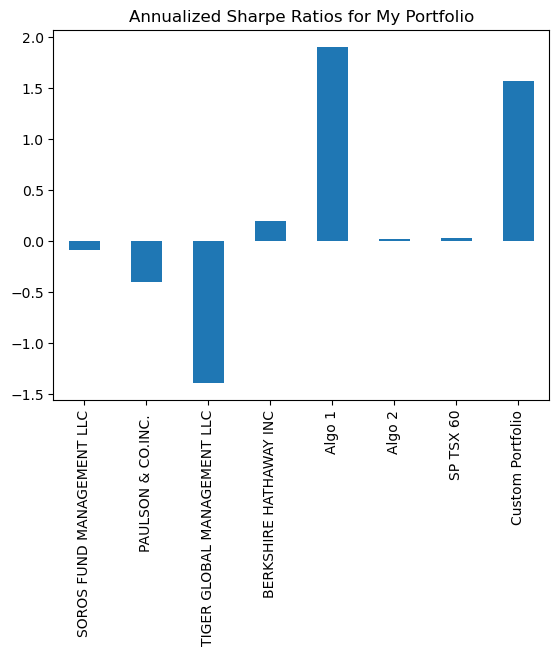

In [46]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind='bar', title="Annualized Sharpe Ratios for My Portfolio")

### How does your portfolio do?

Write your answer here!

Overall my porffolio is in good performance, they are all in positive trend. Algo has the greatest sharpe ratios.